In [1]:
import keras
keras.__version__

'2.8.0'

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
پیش‌بینی قیمت خانه‌ها: مثال رگرسیون
  <br><br>
  <font size="+1" face="homa">
  فصل ۳ قسمت ۵ 
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
دو مثال قبلی، مسئله‌های دسته‌بندی بودند که هدف آن‌ها پیش‌بینی یک برچسب مشخص برای نمونه‌های ورودی بود. رگرسیون، نوع دیگری از مسائل یادگیری ماشین است که به جای پیش‌بینی یک برچسب گسسته، شامل پیش‌بینی یک مقدار پیوسته است. به عنوان مثال، پیش‌بینی دمای هوای فردا، با داده‌های هواشناختی یا پیش‌بینی زمان تکمیل یک پروژه نرم‌افزار با استفاده از مشخصات آن.
<br>
نکته: رگرسیون را با الگوریتم رگرسیون لجستیک اشتباه نگیرید. رگرسیون لجستیک، یک الگوریتم رگرسیون نیست بلکه الگوریتم دسته‌بندی است.
<br>
  <b>
مجموعه ‌داده قیمت مسکن در شهر بوستون
  </b>
<br>
با استفاده از داده‌های حومه شهر بوستون که متعلق به اواسط دهه 1970 است سعی خواهیم کرد قیمت متوسط مسکن را در این شهر پیش‌بینی کنیم. داده‌های این مجموعه، شامل ویژگی‌هایی همچون میزان جرم و جنایت، میزان مالیات محلی و غیره است. 
<br>
 مجموعه ‌داده¬ای که از آن استفاده می‌کنیم دو تفاوت جالب با دو مثال قبلی دارد. داده‌های آن نسبتاً کم‌تر هستند: تنها شامل 506 داده است که به 404 نمونه آموزشی و 102 نمونه آزمایش تقسیم‌ شده‌اند و هر ویژگی در نمونه‌های ورودی (به عنوان مثال، میزان جرم و جنایت) مقیاس متفاوتی دارد. به عنوان مثال، برخی از مقادیر به صورت درصد هستند و بین صفر و یک قرار می‌گیرند، برخی از مقادیر بین 1 تا 12، برخی بین صفر و 100 هستند.
<br>
 حال باید داده‌ها را بررسی کنیم:

In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

<p dir="rtl" align="justify">
<font face="homa">
همان‌طور که مشاهده می‌کنید، 404 نمونه آموزشی و 102 نمونه آزمایشی داریم که هرکدام 13 ویژگی عددی دارند؛ مانند سرانه میزان جرم و جنایت، تعداد متوسط اتاق‌ها در هر خانه، دسترسی به بزرگراه‌ها و غیره.
<br>



1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

In [5]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

<p dir="rtl" align="justify">
<font face="homa">
قیمت‌ها عموماً بین 10 و 50 هزار دلار هستند. شایان ذکر است که قیمت‌ها مربوط به اواسط دهه 1970 هستند و بر اساس تورم تنظیم‌ نشده‌اند.
<br>



<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
آماده‌سازی داده‌ها 
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
واردکردن مقادیری با دامنه‌های کاملاً متفاوت در شبکه‌های عصبی می‌تواند مشکل‌ساز باشد. شاید شبکه بتواند به طور خودکار با چنین داده‌های ناهمگنی سازگار شود، اما مشخصاً با این کار، یادگیری بسیار مشکل‌تر خواهد شد. بهترین و متداول‌ترین روش برخورد با چنین داده‌هایی انجام نرمال‌سازی مبتنی بر ویژگی است؛ از هر ویژگی نمونه‌های ورودی (یک ستون در ماتریس نمونه‌های ورودی)، میانگین آن ویژگی را تفریق کرده و به انحراف معیارش تقسیم می‌کنیم، بدین ترتیب ویژگی در حوالی صفر متمرکز شده و انحراف معیار برابر یک خواهد داشت. این کار به‌آسانی در نام‌پای قابل انجام است. 


In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

<p dir="rtl" align="justify">
<font face="homa">
توجه داشته باشید که کمیت‌های مورد استفاده برای نرمال‌سازی داده‌های آزمایش با استفاده از داده‌های آموزشی محاسبه می‌شوند. در روند کار، حتی در مورد چیزهایی به‌سادگی نرمال‌سازی داده‌ها، هرگز نباید از کمیتی استفاده کنید که بر اساس داده‌های آزمایش محاسبه شده است. 
<br>



<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
ساخت شبکه 
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
به دلیل تعداد بسیار کم نمونه‌ها، از شبکه‌ای بسیار کوچک با دو لایه پنهان، هرکدام با 64 واحد، استفاده خواهیم کرد. به طورکلی، هرچه تعداد داده‌های آموزشی کمتر باشد، خطر بیش برازش بیشتر خواهد بود و استفاده از شبکه کوچک یکی از راه‌های اجتناب از بیش برازش است. 


In [7]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

<p dir="rtl" align="justify">
<font face="homa">
لایه آخر شبکه، یک واحد داشته و بدون تابع فعال‌ساز است (یک‌لایه خطی خواهد بود). چنین رویکردی، روال معمول انجام رگرسیون است (رگرسیونی که در آن سعی داریم یک مقدار پیوسته را پیش‌بینی کنیم). استفاده از تابع فعال‌ساز، دامنه را محدود می‌سازد؛ به عنوان مثال، در صورتی که از تابع فعال‌سازی سیگموید برای لایه آخر استفاده کنیم، شبکه فقط پیش‌بینی مقادیر بین صفر و یک را یاد خواهد گرفت. در اینجا، به خاطر خطی بودن، آخرین لایه، شبکه می‌تواند آزادانه مقادیر را در هر دامنه‌ای پیش‌بینی کند.
<br>
توجه داشته باشید که شبکه را با تابع هزینه mse یا همان میانگین مربعات خطا کامپایل می‌کنیم. استفاده از این تابع هزینه برای مسائل رگرسیون متداول است. 
<br>
همچنین، معیار جدیدی در طول آموزش گزارش می‌شود. میانگین خطای مطلق  (MAE) که میانگین قدر مطلق تفاضل بین پیش‌بینی‌ها و خروجی‌ها است، بدون اینکه به توان دو رسیده باشد. به عنوان مثال، میانگین خطای مطلق 5/0 در این مسئله بدین معناست که پیش‌بینی‌های ما به طور متوسط تا 500 دلار اشتباه هستند.

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
اعتبارسنجی رویکرد با استفاده از اعتبارسنجی K بخشی 
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
</b>
برای ارزیابی شبکه در حین تنظیم پارامترها (مانند تعداد تکرار‌های مورداستفاده برای آموزش)، همانند مثال قبل، می‌توان داده‌ها را به دو دسته آموزش و اعتبارسنجی تقسیم کرد؛ اما به دلیل تعداد کم داده‌ها، مجموعه اعتبارسنجی بسیار کوچک (به عنوان مثال، در حدود 10 مثال) خواهد بود. در نتیجه، بسته به توزیع داده‌ها در مجموعه‌های آموزش و اعتبارسنجی، ارقام به ‌دست‌ آمده از اعتبارسنجی بسیار متغیر خواهند بود؛ به عبارتی نتایج اعتبارسنجی، به دلیل وابستگی زیاد به مجموعه اعتبارسنجی واریانس بالایی خواهند داشت؛ بنابراین نتایج ارزیابی مدل قابلیت اطمینان بالایی نخواهند داشت.
<p dir="rtl" align="justify">
<font face="homa">
</b>
بهترین روش در چنین موقعیتی استفاده از اعتبارسنجی متقابل K بخشی  است . این روش شامل تقسیم مجموعه ‌داده به K بخش است (معمولاً 4 یا 5) که در هر بار به ترتیب هریک از K بخش به عنوان مجموعه اعتبارسنجی انتخاب‌ شده و از بقیه مجموعه ‌داده برای آموزش شبکه استفاده می‌شود. بدین ترتیب، نتیجه نهایی اعتبارسنجی برابر با میانگین نتایج به ‌دست ‌آمده از K اعتبارسنجی خواهد بود. پیاده‌سازی مفهوم فوق بسیار ساده است:


<p dir="rtl" align="justify">
<font face="homa">
لایه آخر شبکه، یک واحد داشته و بدون تابع فعال‌ساز است (یک‌لایه خطی خواهد بود). چنین رویکردی، روال معمول انجام رگرسیون است (رگرسیونی که در آن سعی داریم یک مقدار پیوسته را پیش‌بینی کنیم). استفاده از تابع فعال‌ساز، دامنه را محدود می‌سازد؛ به عنوان مثال، در صورتی که از تابع فعال‌سازی سیگموید برای لایه آخر استفاده کنیم، شبکه فقط پیش‌بینی مقادیر بین صفر و یک را یاد خواهد گرفت. در اینجا، به خاطر خطی بودن، آخرین لایه، شبکه می‌تواند آزادانه مقادیر را در هر دامنه‌ای پیش‌بینی کند.
<br>
توجه داشته باشید که شبکه را با تابع هزینه mse یا همان میانگین مربعات خطا کامپایل می‌کنیم. استفاده از این تابع هزینه برای مسائل رگرسیون متداول است. 
<br>
همچنین، معیار جدیدی در طول آموزش گزارش می‌شود. میانگین خطای مطلق  (MAE) که میانگین قدر مطلق تفاضل بین پیش‌بینی‌ها و خروجی‌ها است، بدون اینکه به توان دو رسیده باشد. به عنوان مثال، میانگین خطای مطلق 5/0 در این مسئله بدین معناست که پیش‌بینی‌های ما به طور متوسط تا 500 دلار اشتباه هستند.

In [8]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [9]:
all_scores

[2.155872344970703, 2.737171173095703, 2.8500094413757324, 2.6129889488220215]

In [10]:
np.mean(all_scores)

2.58901047706604

<p dir="rtl" align="justify">
<font face="homa">
اجراهای مختلف، نتایج اعتبارسنجی متفاوتی را در بازه 6/2 تا 2/3 نشان می‌دهند. در صورتی که بعد از محاسبه میانگین به متوسط (0/3) می‌رسیم که معیار قابل‌اطمینانی در مقایسه با نتیجه هر یک از بخش‌ها است. همین اطمینان از نتیجه اعتبارسنجی، هدفی است که روش اعتبارسنجی متقابل K بخشی به دنبال آن است. در مورد این مسئله خاص، به طور متوسط تا 3000 دلار خطا داریم که با توجه به دامنه 10 تا 50 هزار دلاری قیمت‌ها، رقم قابل‌توجهی است.
<br>
حال می‌خواهیم شبکه را کمی بیشتر آموزش دهیم و تعداد تکرار را به 500 افزایش می‌دهیم. برای ثبت عملکرد مدل در هر تکرار، حلقه آموزش را اصلاح خواهیم کرد تا لگاریتم نتیجه اعتبارسنجی برای هر تکرار را ذخیره کنیم.

In [11]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [14]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


<p dir="rtl" align="justify">
<font face="homa">
درنهایت می‌توان خطای MAE را برای هر تکرار و برای تمامی بخش‌ها محاسبه کرد.
<br>


In [15]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

<p dir="rtl" align="justify">
<font face="homa">
به نمودار آن در شکل توجه کنید. 
<br>


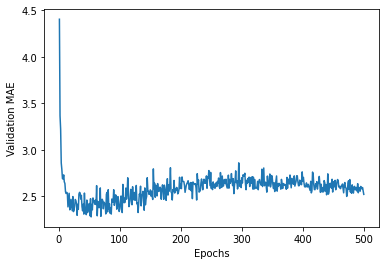

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

<p dir="rtl" align="justify">
<font face="homa">
 به خاطر مقیاس نامناسب و تا حدودی بالا بودن واریانس، ممکن است درک نمودار کمی مشکل باشد. پس به صورت زیر عمل می‌کنیم:
<br>
*	10 نقطه اول را که مقیاس‌ متفاوتی نسبت به بقیه منحنی دارند را حذف می‌کنیم.
<br>
*	هر نقطه را با میانگین نمایی نقطه‌های قبلی جایگزین می‌کنیم تا منحنی یکدستی به دست بیاید.
<br>

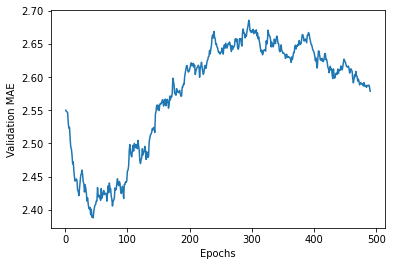

In [17]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

<p dir="rtl" align="justify">
<font face="homa">
بر اساس این نمودار، کاهش خطای MAE حاصل از اعتبارسنجی بعد از 80 تکرار به طور چشم‌گیری متوقف می‌شود. بعد از این نقطه، بیش‌برازش آغاز می‌شود.
<br>
بعد از اتمام تنظیم سایر پارامترهای مدل (علاوه بر تعداد تکرار‌ها، می‌توانید اندازه لایه‌های پنهان را نیز تنظیم کنید)، می‌توان بر اساس تمامی داده‌های آموزشی، مدل نهایی را با بهترین پارامترها آموزش داد و در نهایت عملکرد آن را روی داده‌های آزمایش سنجید.

In [18]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 1s 163ms/step - loss: 18.8938 - mae: 2.6460


In [19]:
test_mae_score

2.6460440158843994

<p dir="rtl" align="justify">
<font face="homa">
هنوز تا دو هزار و 550 دلار خطا وجود دارد.

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
جمع‌بندی
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
مواردی که باید از این مثال بیاموزید به شرح زیر هستند:
<br>
*	توابع هزینه رگرسیون با توابع هزینه دسته‌بندی متفاوت هستند. تابع هزینه متداول در رگرسیون، میانگین مربعات خطا (MSE) است.
<br>
*	به همین ترتیب، معیارهای اعتبارسنجی رگرسیون متفاوت از معیارهای به کار رفته در دسته‌بندی هستند؛ طبیعتاً، مفهوم دقت در رگرسیون کاربردی ندارد. معیار معمول رگرسیون، میانگین خطای مطلق (MAE) است.
<br>
*	زمانی که ویژگی‌های ورودی دامنه‌های متفاوتی دارند، هر ویژگی باید به صورت مستقل و به عنوان گامی از پیش‌پردازش مقیاس‌بندی شود.
<br>
*	برای کار با برچسب‌ها در دسته‌بندی چند کلاسی از دو روش زیر می‌توان استفاده کرد:
<br>
*	زمانی که داده‌های در دسترس کم هستند، استفاده از اعتبارسنجی K بخشی روش بسیار خوبی برای ارزیابی مطمئن مدل است.
<br>
*	زمانی که داده‌های آموزشی کم هستند، برای اجتناب از بیش‌برازش شدید، استفاده از شبکه کوچک با لایه‌های پنهان کم (معمولاً فقط یک یا دولایه) ترجیح داده می‌شود.
<br><br>
	حال می‌توانید متداول‌ترین انواع کارهای یادگیری ماشین را روی داده‌های برداری انجام دهید:
<br>
   دسته‌بندی دودویی،
<br>
    دسته‌‌بندی چند کلاسی
<br>
     و رگرسیون اسکالر. 
<br>

